In [6]:
import pandas as pd

# Load all datasets
df1 = pd.read_excel("/Users/paulmuchembled/Desktop/afrikids.xls", sheet_name="Learner Data Template")
df2 = pd.read_excel("/Users/paulmuchembled/Desktop/afrikids2.xls", sheet_name="Learner Data Template")
df3 = pd.read_excel("/Users/paulmuchembled/Desktop/afrikids3.xlsx", sheet_name="Learner Data Template")
df4 = pd.read_excel("/Users/paulmuchembled/Desktop/afrikids4.xls", sheet_name="Learner Data Template")
df5 = pd.read_excel("/Users/paulmuchembled/Desktop/afrikids5.xls", sheet_name="Learner ")

# Combine the 'GRADUATED (YES/NO)' columns from all datasets into one DataFrame
graduated_combined = pd.concat([df1['GRADUATED (YES/NO)'], 
                                df2['GRADUATED (YES/NO)'], 
                                df3['GRADUATED (YES/NO)'], 
                                df4['GRADUATED (YES/NO)'], 
                                df5['GRADUATED (YES/NO)']], axis=0)

# Standardize the values (if needed)
graduated_combined = graduated_combined.str.upper().fillna('UNKNOWN')

# Calculate the value counts of 'YES' and 'NO'
graduation_count = graduated_combined.value_counts()

# Calculate total entries
total_graduates = graduation_count['YES'] + graduation_count['NO']

# Calculate the percentage of 'YES' and 'NO'
graduated_percentage = (graduation_count['YES'] / total_graduates) * 100
not_graduated_percentage = (graduation_count['NO'] / total_graduates) * 100

# Print the results
print(f"Percentage of students who graduated (YES): {graduated_percentage:.2f}%")
print(f"Percentage of students who did not graduate (NO): {not_graduated_percentage:.2f}%")


Percentage of students who graduated (YES): 96.72%
Percentage of students who did not graduate (NO): 3.28%


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load all datasets
df1 = pd.read_excel("/Users/paulmuchembled/Desktop/afrikids.xls", sheet_name="Learner Data Template")
df2 = pd.read_excel("/Users/paulmuchembled/Desktop/afrikids2.xls", sheet_name="Learner Data Template")
df3 = pd.read_excel("/Users/paulmuchembled/Desktop/afrikids3.xlsx", sheet_name="Learner Data Template")
df4 = pd.read_excel("/Users/paulmuchembled/Desktop/afrikids4.xls", sheet_name="Learner Data Template")
df5 = pd.read_excel("/Users/paulmuchembled/Desktop/afrikids5.xls", sheet_name="Learner ")

# List of all DataFrames
dfs = [df1, df2, df3, df4, df5]

# Function to calculate graduation rate
def calculate_graduation_rate(df, df_name):
    graduation_count = df['GRADUATED (YES/NO)'].str.upper().fillna('UNKNOWN').value_counts()
    total_students = graduation_count.get('YES', 0) + graduation_count.get('NO', 0)
    
    if total_students == 0:
        print(f"{df_name}: No data available for calculation")
        return None
    
    graduated_percentage = (graduation_count.get('YES', 0) / total_students) * 100
    not_graduated_percentage = (graduation_count.get('NO', 0) / total_students) * 100
    
    print(f"{df_name}:\n  Percentage of students who graduated (YES): {graduated_percentage:.2f}%")
    print(f"  Percentage of students who did not graduate (NO): {not_graduated_percentage:.2f}%\n")
    
    return df['GRADUATED (YES/NO)'].str.upper()

# Calculate stats for each individual dataset
for i, df in enumerate(dfs, start=1):
    calculate_graduation_rate(df, f'Dataset {i}')

# Combine the 'GRADUATED (YES/NO)' columns from all datasets into one combined series
graduated_combined = pd.concat([calculate_graduation_rate(df, f'Dataset {i}') for i, df in enumerate(dfs, start=1)], axis=0)

# Calculate stats for the combined dataset
graduation_count_combined = graduated_combined.value_counts()
total_graduates_combined = graduation_count_combined.get('YES', 0) + graduation_count_combined.get('NO', 0)

# Calculate the percentage of 'YES' and 'NO' for the combined dataset
graduated_percentage_combined = (graduation_count_combined.get('YES', 0) / total_graduates_combined) * 100
not_graduated_percentage_combined = (graduation_count_combined.get('NO', 0) / total_graduates_combined) * 100

# Print the results for the combined dataset
print(f"Combined Dataset:\n  Percentage of students who graduated (YES): {graduated_percentage_combined:.2f}%")
print(f"  Percentage of students who did not graduate (NO): {not_graduated_percentage_combined:.2f}%")


Dataset 1:
  Percentage of students who graduated (YES): 84.39%
  Percentage of students who did not graduate (NO): 15.61%

Dataset 2:
  Percentage of students who graduated (YES): 95.41%
  Percentage of students who did not graduate (NO): 4.59%

Dataset 3:
  Percentage of students who graduated (YES): 98.27%
  Percentage of students who did not graduate (NO): 1.73%

Dataset 4:
  Percentage of students who graduated (YES): 98.63%
  Percentage of students who did not graduate (NO): 1.37%

Dataset 5:
  Percentage of students who graduated (YES): 97.74%
  Percentage of students who did not graduate (NO): 2.26%

Dataset 1:
  Percentage of students who graduated (YES): 84.39%
  Percentage of students who did not graduate (NO): 15.61%

Dataset 2:
  Percentage of students who graduated (YES): 95.41%
  Percentage of students who did not graduate (NO): 4.59%

Dataset 3:
  Percentage of students who graduated (YES): 98.27%
  Percentage of students who did not graduate (NO): 1.73%

Dataset 4:
  P

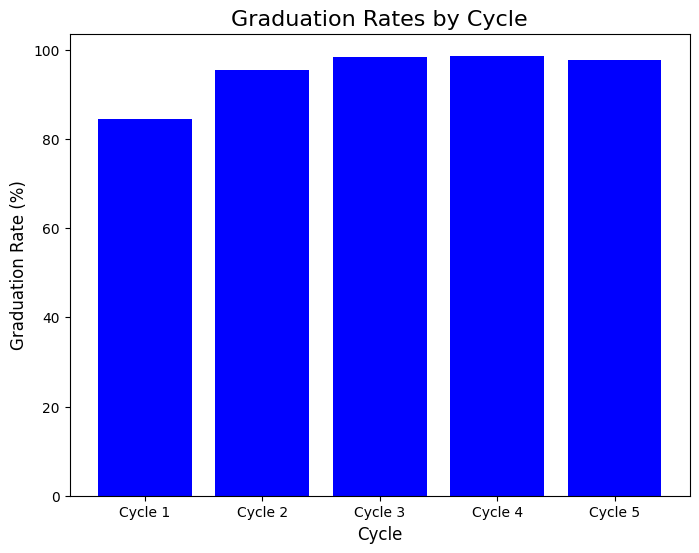

In [10]:
# Function to calculate graduation rate
def calculate_graduation_rate(df):
    graduation_count = df['GRADUATED (YES/NO)'].str.upper().fillna('UNKNOWN').value_counts()
    total_students = graduation_count.get('YES', 0) + graduation_count.get('NO', 0)
    if total_students == 0:
        return None
    graduated_percentage = (graduation_count.get('YES', 0) / total_students) * 100
    return graduated_percentage

# Collect graduation rates for each dataset
graduation_rates = []
for i, df in enumerate(dfs, start=1):
    grad_rate = calculate_graduation_rate(df)
    if grad_rate is not None:
        graduation_rates.append(grad_rate)

# Plot the bar chart
cycle_labels = [f'Cycle {i}' for i in range(1, len(graduation_rates) + 1)]

plt.figure(figsize=(8, 6))
plt.bar(cycle_labels, graduation_rates, color='blue')

# Add title and labels
plt.title('Graduation Rates by Cycle', fontsize=16)
plt.xlabel('Cycle', fontsize=12)
plt.ylabel('Graduation Rate (%)', fontsize=12)

# Show the plot
plt.show()